In [13]:
from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [14]:
%matplotlib inline
from __future__ import print_function
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from ipywidgets import *
from traitlets import *

import numpy as np

## These curves represent the time course of blood THC levels after administration by smoking/ingestion.

## The curve below is a pharmacokinetic curve based on the Hill equation representing THC levels in the bloodstream after smoking.

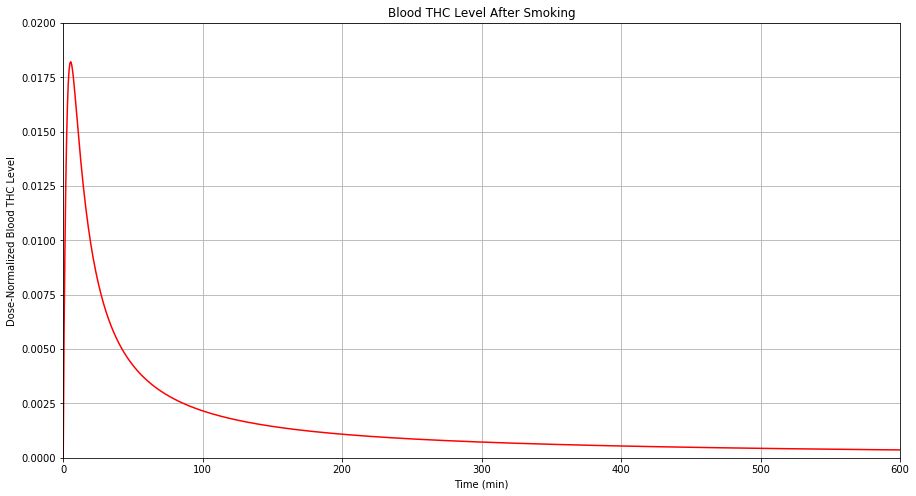

In [15]:
alpha = 1.8
c = 6
relaxTime = 1 #This factor affects the time it takes to return to baseline.
xOffset = 0
defaultVasofactor = 1

def normalize(ySet, x):
    return ySet/np.trapz(ySet, x) #numpy.trapz integrates

def hillEquation(alpha, c, relaxTime, xOffset, vasofactor):
    return (alpha*(c**alpha)*(((x-xOffset)*vasofactor)**(alpha-1)))/(c**alpha + ((x-xOffset)*vasofactor)**alpha)**relaxTime

x = np.linspace(0, 600, 1000)  # 1000 evenly-spaced values from 0 to 4
ySmoking = hillEquation(alpha, c, relaxTime, xOffset, defaultVasofactor)
#ySmoking = (alpha*(c**alpha)*(x**(alpha-1)))/(c**alpha + x**alpha)**relaxTime



plt.figure(figsize=(15,8))
plt.axis([-0.1, 600, 0, 0.020])
plt.xlabel('Time (min)')
plt.ylabel('Dose-Normalized Blood THC Level')
plt.title('Blood THC Level After Smoking')
plt.grid(True)


plt.plot(x, normalize(ySmoking, x), 'r')

plt.show()

## Shown below is a comparison of the curves for smoking (red), ingesting THC (green). These curves are normalized to have the same integral, and the smoking curve is multiplied by a factor representing the proportion of THC lost to combustion during smoking.

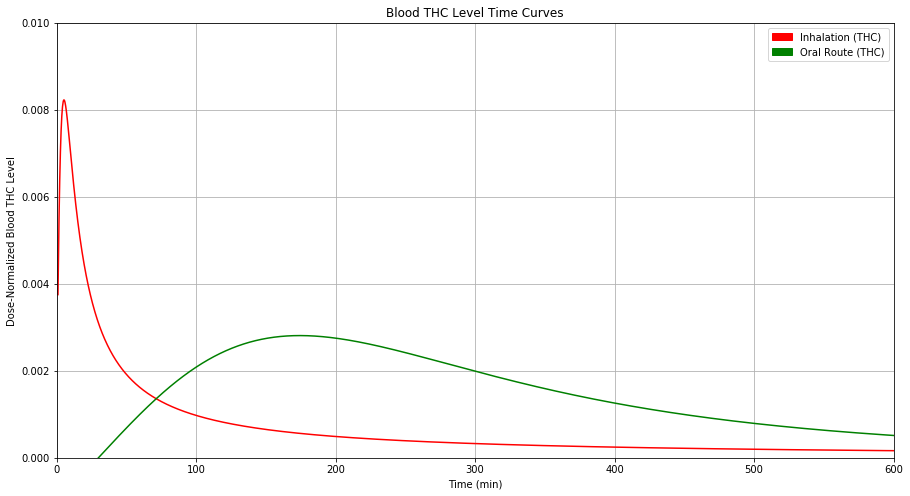

In [16]:
mu = 3
stretchFactor = 5
scaleFactor = 1

alphaSmoke = 1.8
cSmoke = 6
relaxTimeSmoke = 1
xOffsetSmoke = 0

alphaTHC = 2
cTHC = 250
relaxTimeTHC = 2
xOffsetTHC = 30

x = np.linspace(1,1000,4000)

defaultVasofactor = 1

yTHC = hillEquation(alphaTHC, cTHC, relaxTimeTHC, xOffsetTHC, defaultVasofactor)
ySmoking = hillEquation(alphaSmoke, cSmoke, relaxTimeSmoke, xOffsetSmoke, defaultVasofactor)

liverFirstPassLossFactor = 1.0 #represents proportion of oral THC dose lost to first-pass liver metabolism
smokeLossFactor = 0.5 #represents proportion of THC dose lost to combustion when smoking.

plt.figure(figsize=(15,8))
plt.axis([0, 600, 0, 0.01])

plt.plot(x, normalize(ySmoking, x)*smokeLossFactor, 'r')
plt.plot(x, normalize(yTHC, x)*liverFirstPassLossFactor, 'g')

red_patch = mpatches.Patch(color='red', label='Inhalation (THC)')
green_patch = mpatches.Patch(color='green', label='Oral Route (THC)')
plt.legend(handles=[red_patch, green_patch])

plt.xlabel('Time (min)')
plt.ylabel('Dose-Normalized Blood THC Level')
plt.title('Blood THC Level Time Curves')
plt.grid(True)

plt.show()

## Shown below is a comparison of the curves for smoking (red), ingesting THC (green), and ingesting our 50/50 THC/THC-Acetate product (blue). The acetate product curve is intermediate between smoking and ingesting THC in terms of peak effect, time to onset, and duration of effects. These curves are normalized to have the same integral, and the smoking curve is multiplied by a factor representing the proportion of THC lost to combustion during smoking.

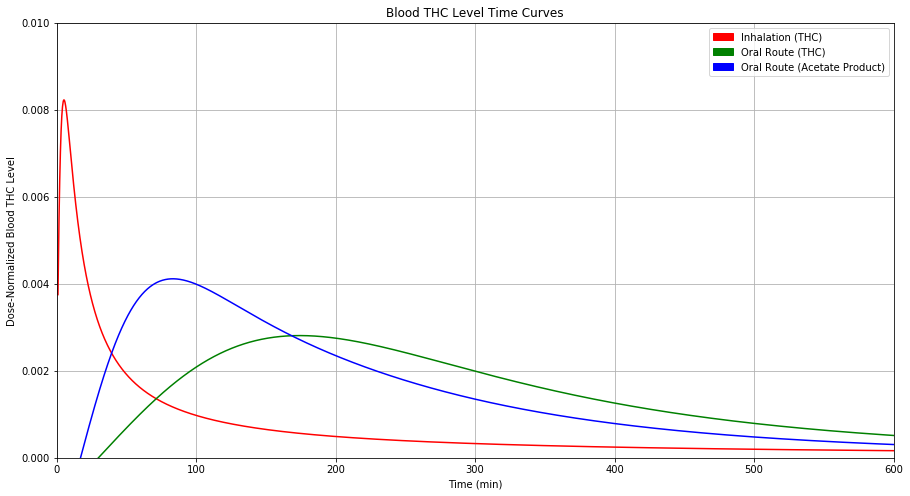

In [17]:
mu = 3
stretchFactor = 5
scaleFactor = 1

alphaSmoke = 1.8
cSmoke = 6
relaxTimeSmoke = 1
xOffsetSmoke = 0

alphaTHC = 2
cTHC = 250
relaxTimeTHC = 2
xOffsetTHC = 30

alphaPureAcetate = 2
cPureAcetate = 100
relaxTimePureAcetate = 2
xOffsetPureAcetate = 15

x = np.linspace(1,1000,4000)

acetatePercent = 0.5
defaultVasofactor = 1

yTHC = hillEquation(alphaTHC, cTHC, relaxTimeTHC, xOffsetTHC, defaultVasofactor)
yPureAcetate = hillEquation(alphaPureAcetate, cPureAcetate, relaxTimePureAcetate, xOffsetPureAcetate, defaultVasofactor)
ySmoking = hillEquation(alphaSmoke, cSmoke, relaxTimeSmoke, xOffsetSmoke, defaultVasofactor)

liverFirstPassLossFactor = 1.0 #represents proportion of oral THC dose lost to first-pass liver metabolism
yAcetateProduct = np.add((1.0 - acetatePercent)*liverFirstPassLossFactor*normalize(yTHC, x), acetatePercent*normalize(yPureAcetate, x))

smokeLossFactor = 0.5 #represents proportion of THC dose lost to combustion when smoking.

plt.figure(figsize=(15,8))
plt.axis([0, 600, 0, 0.01])

plt.plot(x, normalize(ySmoking, x)*smokeLossFactor, 'r')
plt.plot(x, normalize(yTHC, x)*liverFirstPassLossFactor, 'g')
plt.plot(x, yAcetateProduct, 'b')

red_patch = mpatches.Patch(color='red', label='Inhalation (THC)')
green_patch = mpatches.Patch(color='green', label='Oral Route (THC)')
blue_patch = mpatches.Patch(color='blue', label = 'Oral Route (Acetate Product)')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.xlabel('Time (min)')
plt.ylabel('Dose-Normalized Blood THC Level')
plt.title('Blood THC Level Time Curves')
plt.grid(True)

plt.show()